Name : Aumkar Gadekar <br>
Rno : 2017130023 <br>

In [385]:
import pandas as pd
import numpy as np
import random

In [416]:
df=pd.read_excel('data.xlsx')
df

,City No,X,Y
0,0,68.283970,448.787844
1,1,165.236665,113.147765
2,2,436.748970,247.630172
3,3,207.607564,49.265974
4,4,365.113146,235.671481
...,...,...,...
96,96,97.445653,253.783778
97,97,215.485124,84.684766
98,98,443.018985,353.707410
99,99,156.067871,391.056818


In [417]:
rows=pd.read_excel('rows.xlsx')
rows

,Roll No.,1,2,3,4,5,6
0,1,3,5,9,17,33,65
1,2,4,6,10,18,34,66
2,3,5,7,11,19,35,67
3,4,6,8,12,20,36,68
4,5,7,9,13,21,37,69
...,...,...,...,...,...,...,...
69,70,72,74,78,86,1,33
70,71,73,75,79,87,2,34
71,72,74,76,80,88,3,35
72,73,75,77,81,89,4,36


In [418]:
rows[rows['Roll No.']==21]

,Roll No.,1,2,3,4,5,6
20,21,23,25,29,37,53,85


In [419]:
select=[23,25,29,37,53,85]
select

[23, 25, 29, 37, 53, 85]

In [420]:
data=np.array(df[['X','Y']])
final_data=data[select,:]

In [421]:
final_data

array([[140.667011, 152.283173],
       [437.215347, 342.013992],
       [482.22344 , 439.135008],
       [486.380526, 117.46663 ],
       [411.382284,  64.137908],
       [335.125418, 220.959407]])

In [422]:
def dist_matrix(findata):
    mat=np.zeros((6,6))
    for i in range(6):
        for j in range(6):
            mat[i][j]=((findata[i][0]-findata[j][0])**2+(findata[i][1]-findata[j][1])**2)**.5
    return mat

In [425]:
mat=dist_matrix(final_data)
dm=pd.DataFrame(mat)
dm

,0,1,2,3,4,5
0,0.000000,352.049285,446.032252,347.462266,284.703963,206.229235
1,352.049285,0.000000,107.043076,229.866771,279.074301,158.355821
2,446.032252,107.043076,0.000000,321.695239,381.629787,263.131946
3,347.462266,229.866771,321.695239,0.000000,92.025480,183.272645
4,284.703963,279.074301,381.629787,92.025480,0.000000,174.379162
5,206.229235,158.355821,263.131946,183.272645,174.379162,0.000000


In [426]:
mapping=dict()
for j in range(6):
    mapping[j]=select[j]
print(mapping)

{0: 23, 1: 25, 2: 29, 3: 37, 4: 53, 5: 85}


#### Define number of cities

In [386]:
n_cities=6

#### Distance matrix

In [400]:
distances=np.random.randint(5,35, size=(n_cities,n_cities))
for i in range(n_cities):
    for j in range(i):
        distances[i][j]=distances[j][i]
    distances[i][i]=0
distances

array([[ 0, 32, 28, 20, 16, 31, 17, 30, 25],
       [32,  0, 28, 21, 12, 29, 12, 29, 20],
       [28, 28,  0, 15, 20, 21, 17, 11, 12],
       [20, 21, 15,  0, 12, 28,  5, 16, 14],
       [16, 12, 20, 12,  0,  5, 13, 33, 20],
       [31, 29, 21, 28,  5,  0, 22, 17, 31],
       [17, 12, 17,  5, 13, 22,  0, 30, 33],
       [30, 29, 11, 16, 33, 17, 30,  0, 24],
       [25, 20, 12, 14, 20, 31, 33, 24,  0]])

#### Pheromones

In [401]:
pheromones=np.zeros((n_cities,n_cities))
pheromones+=0.02
pheromones

array([[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]])

In [402]:
delta_pheromones=np.zeros((n_cities,n_cities))
delta_pheromones.shape

(9, 9)

#### Fitness function

In [403]:
def fit(fitness,tabu,curr):
    for i in range(len(tabu)):
        if(tabu[i]==1):
            fitness[i]=0
        else:
            fitness[i]=pheromones[curr-1][i]/(distances[curr-1][i])
    return fitness

#### Probability

In [404]:
def probability(prob,fitness):
    denom=sum(fitness)
    for i in range(len(fitness)):
        prob[i]=fitness[i]/denom
    return prob

#### Roulette

In [405]:
def roulette(arr):
    new=[]
    curr=0
    for i in range(len(arr)):
        new.append(arr[i]+curr)
        curr=new[i]
    return new

#### Choose next city

In [406]:
def choose(roul,tabu,order):
    r=random.random()
    for i in range(len(roul)):
        if(r<=roul[i]):
            sel=i+1
            tabu[i]=1
            order.append(sel)
            return sel 

In [407]:
iter=0
start=1
n_ants=8
cost_sum=[]
m_cost=[]
while(iter<300):
    print("====================================================================================================")
    print("Iteration number "+str(iter)+" ")
    tot_cost=0
    min_cost=5000
    for i in range(n_ants):
        tabu=[0]*n_cities
        tabu[0]=1
        counter=1
        curr=1
        order=[1]
        while(counter<n_cities):
            
  #          print("Distances ",distances[curr-1])
  #          print("Pheromones ",pheromones[curr-1])
            
            
            fitness=[0]*n_cities
            fitness=fit(fitness,tabu,curr)
  #          print(tabu,order)
  #          print("Fitness ",fitness)
            
            
            prob=[0]*n_cities
            prob=probability(prob,fitness)
            
  #          print("probability ", prob)
            roul=roulette(prob)
            sel=choose(roul,tabu,order)
            
  #          print(order)
            delta_pheromones[curr-1][sel-1]+=1/distances[curr-1][sel-1]
            
            curr=sel
            counter+=1

        delta_pheromones[order[n_cities-1]-1][0]+=1/distances[order[n_cities-1]-1][0]
        ordzz=[j-1 for j in order]
        tot_cost+=cost(ordzz)
        min_cost=min(cost(ordzz),min_cost)
        print(cost(ordzz),order)
        
    cost_sum.append(tot_cost)
    m_cost.append(min_cost)
    pheromones=0.9*pheromones
    pheromones=pheromones+delta_pheromones
    delta_pheromones=np.zeros((n_cities,n_cities))
    print(pheromones)
    iter+=1
    print(iter)

Iteration number 0 
197 [1, 5, 7, 3, 9, 6, 4, 2, 8]
164 [1, 2, 5, 4, 7, 6, 3, 8, 9]
202 [1, 3, 2, 4, 9, 5, 7, 8, 6]
195 [1, 7, 4, 8, 5, 3, 6, 9, 2]
178 [1, 2, 5, 4, 3, 9, 6, 8, 7]
170 [1, 6, 3, 8, 9, 4, 5, 7, 2]
167 [1, 3, 6, 5, 7, 4, 2, 9, 8]
153 [1, 7, 4, 8, 3, 9, 5, 2, 6]
[[0.018      0.0805     0.08942857 0.018      0.0805     0.05025806
  0.13564706 0.018      0.018     ]
 [0.0805     0.018      0.018      0.06561905 0.18466667 0.05248276
  0.018      0.05248276 0.068     ]
 [0.018      0.05371429 0.018      0.018      0.018      0.1132381
  0.018      0.19981818 0.268     ]
 [0.018      0.1132381  0.08466667 0.018      0.10133333 0.018
  0.218      0.143      0.08942857]
 [0.018      0.10133333 0.068      0.18466667 0.018      0.018
  0.32569231 0.018      0.018     ]
 [0.08251613 0.018      0.1132381  0.05371429 0.218      0.018
  0.018      0.07682353 0.05025806]
 [0.07682353 0.10133333 0.07682353 0.618      0.018      0.06345455
  0.018      0.05133333 0.018     ]
 [0.08466667

  2.62004102e-05]]
63
Iteration number 63 
131 [1, 7, 4, 5, 6, 8, 3, 9, 2]
131 [1, 7, 4, 5, 6, 8, 3, 9, 2]
118 [1, 5, 6, 8, 3, 9, 2, 7, 4]
131 [1, 7, 4, 5, 6, 8, 3, 9, 2]
118 [1, 5, 6, 8, 3, 9, 2, 7, 4]
131 [1, 7, 4, 5, 6, 8, 3, 9, 2]
118 [1, 5, 6, 8, 3, 9, 2, 7, 4]
131 [1, 7, 4, 5, 6, 8, 3, 9, 2]
[[2.35803692e-05 2.07912346e-03 1.25854376e-03 2.13264790e-04
  1.76219733e+00 2.15464827e-04 3.02996837e+00 3.08153881e-03
  2.35803692e-05]
 [1.23904655e+00 2.35803692e-05 9.48903017e-05 2.77308706e-03
  1.02177993e+00 4.61353313e-04 2.25987830e+00 1.16894993e-02
  2.33669384e-02]
 [1.85050766e-02 1.85888907e-04 2.35803692e-05 2.26463884e-04
  2.35803692e-05 1.48344227e-04 2.35803692e-05 8.16966172e-03
  6.60738873e+00]
 [1.34894168e+00 3.43972067e-03 4.03150609e-01 2.35803692e-05
  3.23084358e+00 2.35803692e-05 2.36521817e-01 4.25194883e-01
  3.85216465e-03]
 [5.97394300e-03 3.88546344e-02 5.45942832e-04 6.19289284e-04
  2.35803692e-05 1.58587851e+01 2.27442519e-03 1.39817960e-04
  2.35803

  3.43230747e-08]]
126
Iteration number 126 
131 [1, 7, 4, 5, 6, 8, 3, 9, 2]
124 [1, 5, 6, 8, 3, 9, 4, 7, 2]
118 [1, 5, 6, 8, 3, 9, 2, 7, 4]
118 [1, 5, 6, 8, 3, 9, 2, 7, 4]
131 [1, 7, 4, 5, 6, 8, 3, 9, 2]
131 [1, 7, 4, 5, 6, 8, 3, 9, 2]
131 [1, 7, 4, 5, 6, 8, 3, 9, 2]
118 [1, 5, 6, 8, 3, 9, 2, 7, 4]
[[3.08907672e-08 2.72369437e-06 1.64871813e-06 2.79381248e-07
  3.46502189e+00 2.82263342e-07 1.44466252e+00 4.03687904e-06
  3.08907672e-08]
 [1.22525912e+00 3.08907672e-08 1.24308241e-07 3.63280093e-06
  9.69535008e-02 6.04382302e-07 3.30224955e+00 1.53134838e-05
  3.06111686e-05]
 [2.42420299e-05 2.43518280e-07 3.08907672e-08 2.96672332e-07
  3.08907672e-08 1.94333980e-07 3.08907672e-08 1.07024244e-05
  6.66658901e+00]
 [2.03033594e+00 4.50610462e-06 8.89163853e-03 3.08907672e-08
  1.94959955e+00 3.08907672e-08 3.16269891e+00 3.18324312e-03
  5.04641469e-06]
 [7.82598784e-06 5.09003679e-05 7.15196307e-07 8.11281662e-07
  3.08907672e-08 1.59998150e+01 2.97954364e-06 1.83164395e-07
  3.089

124 [1, 5, 6, 8, 3, 9, 4, 7, 2]
[[1.04453790e-10 9.20987811e-09 5.57496216e-09 9.44697494e-10
  4.19959537e+00 9.54442983e-10 7.53321932e-01 1.36502701e-08
  1.04453790e-10]
 [2.03685215e+00 1.04453790e-10 4.20334882e-10 1.22839237e-08
  2.51220666e-01 2.04365343e-09 9.83839912e-01 5.17808902e-08
  1.03508358e-07]
 [8.19718038e-08 8.23430743e-10 1.04453790e-10 1.00316543e-09
  1.04453790e-10 6.57119348e-10 1.04453790e-10 3.61890913e-08
  6.66666640e+00]
 [7.41005285e-01 1.52369057e-08 3.00661146e-05 1.04453790e-10
  8.15985228e-01 1.04453790e-10 1.10774895e+01 1.07637925e-05
  1.70639058e-08]
 [2.64627320e-08 1.72114092e-07 2.41835901e-09 2.74326125e-09
  1.04453790e-10 1.59999994e+01 1.00750048e-08 6.19350605e-10
  1.04453790e-10]
 [5.49455296e-06 3.15576002e-08 3.63977350e-08 9.31957346e-10
  5.20432535e-07 1.04453790e-10 9.58339215e-09 4.70587204e+00
  4.15389769e-09]
 [2.29538237e-08 4.86678953e+00 2.09942255e-08 4.31970487e+00
  2.61612008e-09 6.93870677e-10 1.04453790e-10 2.97886

Iteration number 252 
124 [1, 5, 6, 8, 3, 9, 4, 7, 2]
124 [1, 5, 6, 8, 3, 9, 4, 7, 2]
124 [1, 5, 6, 8, 3, 9, 4, 7, 2]
124 [1, 5, 6, 8, 3, 9, 4, 7, 2]
124 [1, 5, 6, 8, 3, 9, 4, 7, 2]
124 [1, 5, 6, 8, 3, 9, 4, 7, 2]
124 [1, 5, 6, 8, 3, 9, 4, 7, 2]
124 [1, 5, 6, 8, 3, 9, 4, 7, 2]
[[5.30133054e-14 4.67427826e-12 2.82945378e-12 4.79461172e-13
  4.42782708e+00 4.84407289e-13 5.38515685e-01 6.92790503e-12
  5.30133054e-14]
 [2.26452662e+00 5.30133054e-14 2.13332052e-13 6.23444487e-12
  5.09681498e-01 1.03721294e-12 1.18247527e-01 2.62802923e-11
  5.25334712e-11]
 [4.16030501e-11 4.17914805e-13 5.30133054e-14 5.09135331e-13
  5.30133054e-14 3.33506985e-13 5.30133054e-14 1.83670056e-11
  6.66666667e+00]
 [3.76757400e-01 7.73316827e-12 1.52594186e-08 5.30133054e-14
  2.53215722e-01 5.30133054e-14 1.38852526e+01 5.46293456e-09
  8.66042341e-12]
 [1.34305983e-11 8.73528564e-11 1.22738681e-12 1.39228405e-12
  5.30133054e-14 1.60000000e+01 5.11335495e-12 3.14338261e-13
  5.30133054e-14]
 [2.78864379

In [408]:
distances

array([[ 0, 32, 28, 20, 16, 31, 17, 30, 25],
       [32,  0, 28, 21, 12, 29, 12, 29, 20],
       [28, 28,  0, 15, 20, 21, 17, 11, 12],
       [20, 21, 15,  0, 12, 28,  5, 16, 14],
       [16, 12, 20, 12,  0,  5, 13, 33, 20],
       [31, 29, 21, 28,  5,  0, 22, 17, 31],
       [17, 12, 17,  5, 13, 22,  0, 30, 33],
       [30, 29, 11, 16, 33, 17, 30,  0, 24],
       [25, 20, 12, 14, 20, 31, 33, 24,  0]])

In [410]:
cost_sum=np.array(cost_sum)/9

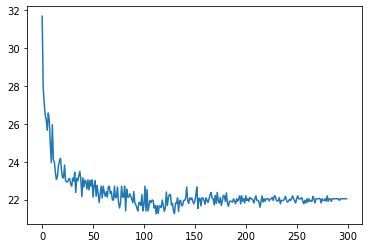

In [411]:
from matplotlib import pyplot as plt
plt.plot(cost_sum)

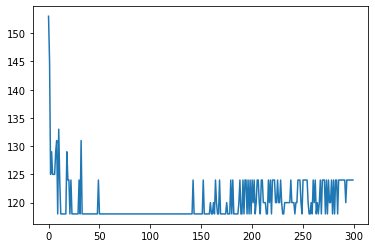

In [412]:
from matplotlib import pyplot as plt
plt.plot(m_cost)

In [399]:
np.round(pheromones,3)

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , 10.535,  0.   ,
         0.894],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  8.889,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , 11.429,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.626,  0.   ,
        10.535],
       [ 0.   ,  5.333,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  3.636,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  8.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.184,  0.   ,  0.   ,  6.704,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [10.535,  0.   ,  0.   ,  0.894,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ]])

In [ ]:
plt.plot()

In [228]:
def cost(ord):
    c=0
    for i in range(n_cities):
        c+=distances[ord[i]][ord[(i+1)%n_cities]]
    return c

In [229]:
distances

array([[  0, 399,  80,  57,  60],
       [399,   0, 413, 264, 179],
       [ 80, 413,   0, 161, 360],
       [ 57, 264, 161,   0, 458],
       [ 60, 179, 360, 458,   0]])

In [415]:
from itertools import permutations

ord=np.arange(n_cities)
comb = list(permutations(ord))
print(ord)
start = 2500
full=[]
for l in comb:
    c=cost(l)
    full.append(c)
    if c < start:
        start = c
        best = l
print(start)
print(best)

[0 1 2 3 4 5 6 7 8]
118
(0, 3, 6, 1, 8, 2, 7, 5, 4)


In [332]:
for l in comb:
    c=cost(l)
    if c == 744:
        print(l)
print(start)
print(best)

86
(0, 1, 3, 5, 2, 6, 7, 4)


In [234]:
cost([0,3,2,4,1])

1156